<a href="https://colab.research.google.com/github/navyavemavarapu/NLP/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/Twitter_Train.csv')
df_test = pd.read_csv('/content/Twitter_Test.csv')

In [ ]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
df_train.shape

(31962, 3)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df = pd.DataFrame(df_train['label'].value_counts()).reset_index()
df.columns = ['Sentiment', 'Count'] 
df

,Sentiment,Count
0,0,29720
1,1,2242


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


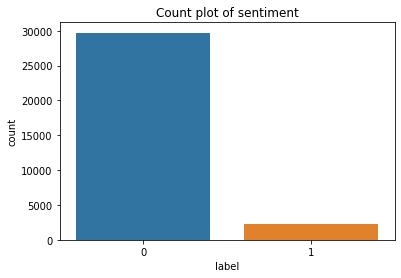

In [ ]:
sns.countplot(df_train['label'])
plt.title("Count plot of sentiment")
plt.show()

label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist.

In [ ]:
print("Percentage of minority class:",(((df_train['label']==1).sum())/df_train.shape[0])*100)
print("Percentage of majority class:",(((df_train['label']==0).sum())/df_train.shape[0])*100)

Percentage of minority class: 7.014579813528565
Percentage of majority class: 92.98542018647143


The data is highly imbalanced

# **Pre-processing the data**

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words - by word tokenisation
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization

#### Removing punctuation (.!<>{}’,”(/)-\#@:)

In train and test data

In [ ]:
df_train['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [ ]:
df_test['tweet']

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [ ]:
df_train['tweet_processed'] = df_train['tweet'].str.replace("[^a-zA-Z0-9]", " ") # ^=notsymbol # replace all special symbols with space
df_test['tweet_processed'] = df_test['tweet'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df_train['tweet_processed']

0          user when a father is dysfunctional and is s...
1         user  user thanks for  lyft credit i can t us...
2                                      bihday your majesty
3         model   i love u take with u all the time in ...
4                   factsguide  society now     motivation
                               ...                        
31957    ate  user isz that youuu                      ...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     user  sikh  temple vandalised in in  calgary ...
31961                     thank you  user for you follow  
Name: tweet_processed, Length: 31962, dtype: object

In [ ]:
df_test['tweet_processed']

0         studiolife  aislife  requires  passion  dedic...
1          user  white  supremacists want everyone to s...
2        safe ways to heal your  acne       altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd  bihday to my amazing  hilarious  nephew...
                               ...                        
17192    thought factory  left right polarisation   tru...
17193    feeling like a mermaid       hairflip  neverre...
17194     hillary  campaigned today in  ohio  omg    am...
17195    happy  at work conference  right mindset leads...
17196    my   song  so glad  free download    shoegaze ...
Name: tweet_processed, Length: 17197, dtype: object

#### Replacing short words

In [ ]:
df_train['tweet_processed'] = df_train['tweet_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df_test['tweet_processed'] = df_test['tweet_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
df_test['tweet_processed']

0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone see the ...
2        safe ways heal your acne altwaystoheal healthy...
3        the and the cursed child book for reservations...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory left right polarisation trump ...
17193    feeling like mermaid hairflip neverready forma...
17194    hillary campaigned today ohio omg amp used wor...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: tweet_processed, Length: 17197, dtype: object

In [ ]:
df_train['tweet_processed']

0        user when father dysfunctional and selfish dra...
1        user user thanks for lyft credit can use cause...
2                                      bihday your majesty
3                        model love take with all the time
4                        factsguide society now motivation
                               ...                        
31957                              ate user isz that youuu
31958    see nina turner the airwaves trying wrap herse...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                        thank you user for you follow
Name: tweet_processed, Length: 31962, dtype: object

#### LowerCase character

In [ ]:
df_train['tweet_processed'] = [tweet.lower() for tweet in df_train['tweet_processed']]
df_test['tweet_processed'] = [tweet.lower() for tweet in df_test['tweet_processed']]

In [ ]:
df_train['tweet_processed']

0        user when father dysfunctional and selfish dra...
1        user user thanks for lyft credit can use cause...
2                                      bihday your majesty
3                        model love take with all the time
4                        factsguide society now motivation
                               ...                        
31957                              ate user isz that youuu
31958    see nina turner the airwaves trying wrap herse...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                        thank you user for you follow
Name: tweet_processed, Length: 31962, dtype: object

In [ ]:
df_test['tweet_processed']

0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone see the ...
2        safe ways heal your acne altwaystoheal healthy...
3        the and the cursed child book for reservations...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory left right polarisation trump ...
17193    feeling like mermaid hairflip neverready forma...
17194    hillary campaigned today ohio omg amp used wor...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: tweet_processed, Length: 17197, dtype: object

#### Remove stop words

In [ ]:
import nltk
nltk.download('punkt') # for punctuation removal
nltk.download('stopwords') # for stopword removal
from nltk.corpus import stopwords #stopwords is a corpus -->collection of words
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
add_words = ['like', 'user', 'new', 'amp', 'get', 'feel', 'girl','year']
stop_words.extend(add_words)

In [ ]:
def remove_stopwords(tweet): 
    tweet_tokenized = word_tokenize(tweet) 
    tweet_new = " ".join([i for i in tweet_tokenized  if i not in stop_words])
    return tweet_new

# Removing stopwords
df_train['tweet_processed'] = [remove_stopwords(r) for r in df_train['tweet_processed']]
df_test['tweet_processed'] = [remove_stopwords(r) for r in df_test['tweet_processed']]

In [ ]:
df_train['tweet_processed']

0        father dysfunctional selfish drags kids dysfun...
1        thanks lyft credit use cause offer wheelchair ...
2                                           bihday majesty
3                                     model love take time
4                            factsguide society motivation
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960      sikh temple vandalised calgary wso condemns act
31961                                         thank follow
Name: tweet_processed, Length: 31962, dtype: object

In [ ]:
df_test['tweet_processed']

0        studiolife aislife requires passion dedication...
1         white supremacists want everyone see birds movie
2        safe ways heal acne altwaystoheal healthy healing
3        cursed child book reservations already yes har...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory left right polarisation trump ...
17193    feeling mermaid hairflip neverready formal wed...
17194    hillary campaigned today ohio omg used words a...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: tweet_processed, Length: 17197, dtype: object

#### Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4') 
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
lemmatizer = WordNetLemmatizer() # initialise
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
    
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) 
    lemmatized_sentence = [] 
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag)) # converts word to root word.
    return " ".join(lemmatized_sentence)


df_train['tweet_processed'] = df_train['tweet_processed'].apply(lambda x: lemmatize_sentence(x))
df_test['tweet_processed'] = df_test['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
df_train['tweet_processed']

0        father dysfunctional selfish drag kid dysfunct...
1        thanks lyft credit use cause offer wheelchair ...
2                                           bihday majesty
3                                     model love take time
4                            factsguide society motivation
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwave try wrap mantle genuin...
31959          listen sad song monday morning otw work sad
31960       sikh temple vandalise calgary wso condemns act
31961                                         thank follow
Name: tweet_processed, Length: 31962, dtype: object

In [ ]:
df_test['tweet_processed']

0        studiolife aislife require passion dedication ...
1           white supremacist want everyone see bird movie
2         safe way heal acne altwaystoheal healthy healing
3        curse child book reservation already yes harry...
4        3rd bihday amaze hilarious nephew eli ahmir un...
                               ...                        
17192    thought factory leave right polarisation trump...
17193    feel mermaid hairflip neverready formal wed go...
17194    hillary campaign today ohio omg use word asset...
17195    happy work conference right mindset lead cultu...
17196    song glad free download shoegaze newmusic newsong
Name: tweet_processed, Length: 17197, dtype: object

#### Plotting Freqent Words

In [ ]:
from nltk import FreqDist
all_words_df_train = df_train.loc[df_train['label'] == 1,:]
all_words = ' '.join([text for text in all_words_df_train['tweet_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words) #gets frequncy of all words
words_df 

FreqDist({'trump': 217, 'white': 156, 'black': 149, 'libtard': 149, 'woman': 122, 'racist': 114, 'say': 97, 'politics': 97, 'people': 95, 'liberal': 92, ...})

In [ ]:
# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

,word,count
0,cnn,15
1,call,64
2,michigan,2
3,middle,2
4,school,22
...,...,...
4891,offend,1
4892,mailbox,1
4893,mailboxpride,1
4894,liberalisme,1


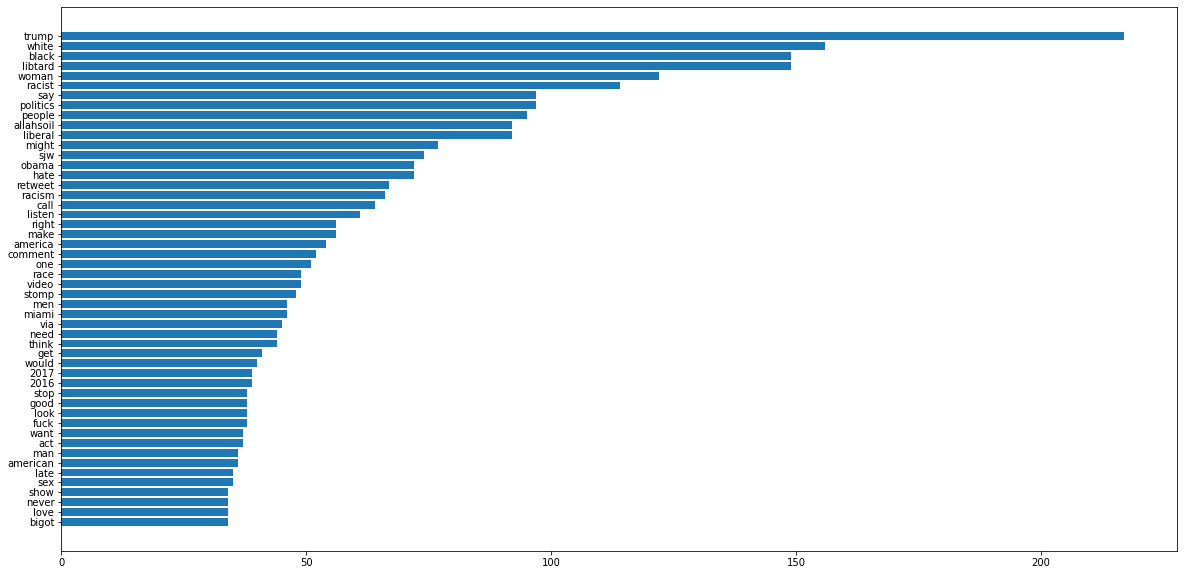

In [ ]:
words_df = words_df.nlargest(columns="count", n = 50) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

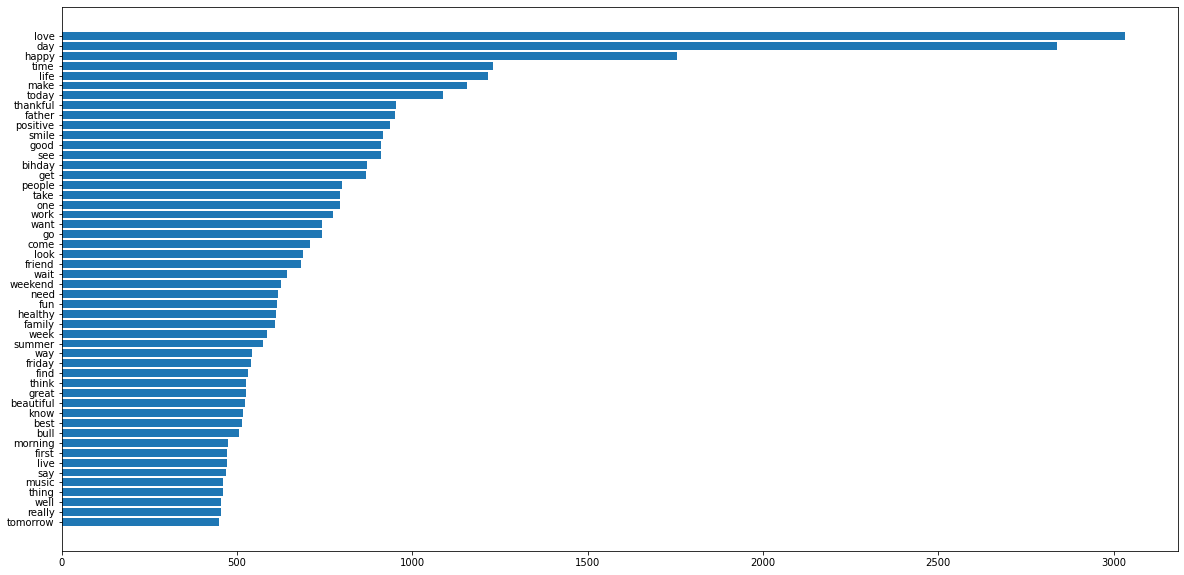

In [ ]:
all_words_df_train = df_train.loc[df_train['label'] == 0,:]
all_words = ' '.join([text for text in all_words_df_train['tweet_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words) #gets frequncy of all words 
# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df = words_df.nlargest(columns="count", n = 50) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### Wordcloud

In [ ]:
from wordcloud import WordCloud
word_cloud_df = df_train.loc[df_train['label'] == 0,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])
all_words

'father dysfunctional selfish drag kid dysfunction run thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked bihday majesty model love take time factsguide society motivation huge fan fare big talk leave chaos pay dispute allshowandnogo camp tomorrow danny next school exam think school exam hate imagine actorslife revolutionschool love land allin cavs champion cleveland clevelandcavaliers welcome gr8 ireland consumer price index mom climb previous may blog silver gold forex selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love see daddy today 80days gettingfed ouch junior angry got7 junior yugyoem omg thankful paner thankful positive friday smile around via cooky make people know essential oil make chemical euro2016 people blame conceded goal fat rooney give away free kick know bale hit sad little dude badday coneofshame cat piss funny laugh product day happy man wine tool weekend time open drink tgif gamedev

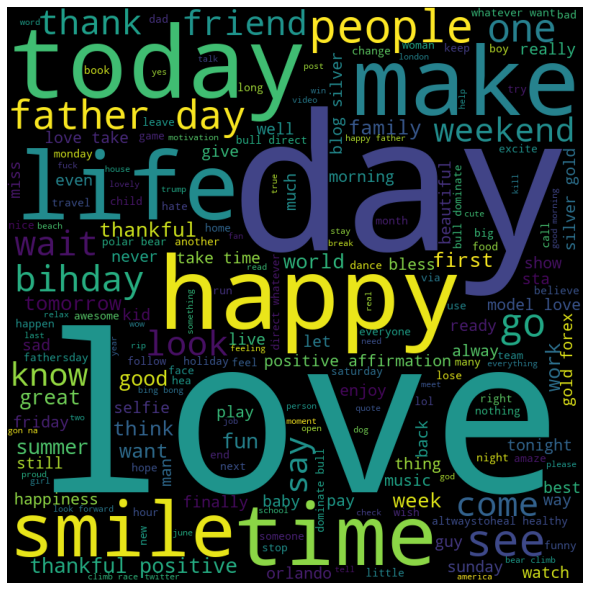

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', # white means white background 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

# **Bag of Words Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
tmp_df = tfidf.fit_transform(df_train.tweet_processed)
feature_names = tfidf.get_feature_names() 
pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100,1000,11th,14th,1gabba,1st,200,2008,2015,...,youtuber,yoy,yr,yrs,yum,yummy,yup,zelda,zen,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = tfidf.fit_transform(df_train.tweet_processed).toarray()
y = df_train.label.values

X, y  

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([0, 0, 0, ..., 0, 1, 0]))

In [ ]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
X_train.shape, X_test.shape

((25569, 2500), (6393, 2500))

### Balancing data

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

# **Building the ML model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_smt,y_smt)

y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[4895 1023]
 [ 116  359]]
The model accuracy is 0.8218363835445018


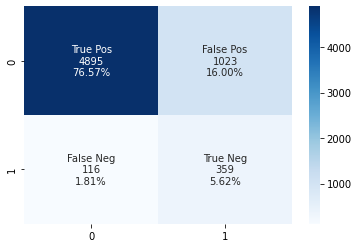

In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.791463510076306

In [ ]:
featureNames = tfidf.get_feature_names()
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Importance,word
177,0.069359,day
441,0.058574,love
548,0.054859,positive
333,0.034977,happy
110,0.025606,bull
...,...,...
796,0.000026,would
571,0.000025,racism
411,0.000025,late
755,0.000024,via
